# Uber Trip Analysis Using Linear Regression

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import radians

# Loading the dataset 

In [2]:
#Loading the dataset
data = pd.read_csv('uber.csv')

In [3]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data.shape #Gives Shape of the dataset

(200000, 9)

In [5]:
data.head() #gives top 5 rows

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data.tail() #gives last 5 rows 

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
# we are dropping key and unnamed because they seem to be no use in our model
data = data.drop(['Unnamed: 0','key'],axis=1) 

In [10]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [12]:
data.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
'''Calculating distance between Pickup Longitute and dropoff Longitude 
as well as Pickup Latitude and dropoff Longitude using "HAVERSINE FORMULA" -'''

def Distance(lo1,lo2,la1,la2):
    lo1,lo2,la3,la4 = map(np.radians,[lo1,lo2,la1,la2]) #degrees to radians
    diff_lon = lo2 - lo1
    diff_lat = la2 - la1
    
    km= 2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                 np.cos(la1) * np.cos(la2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [16]:
#Distance travelled per ride
data['Distance']=Distance(data['pickup_longitude'],data['dropoff_longitude'],
                            data['pickup_latitude'],data['dropoff_latitude'])

In [17]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,96.436041
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,140.799105
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,203.142895
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,79.678402
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,109.468604
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,5.925306
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,17.895955
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,407.342242
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,191.371401


In [18]:
#round the distance value to decimal points
data['Distance'] = data['Distance'].astype(float).round(2)

In [19]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,96.44
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,140.80
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,203.14
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,79.68
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,109.47
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,5.93
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,17.90
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,407.34
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,191.37


In [20]:
data.shape

(199999, 8)

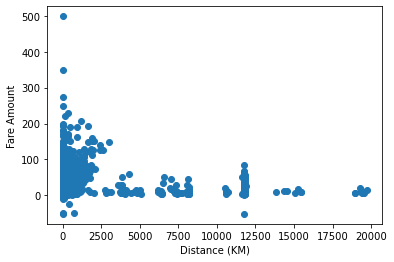

In [21]:
#Plotting the data 
plt.scatter(data['Distance'],data['fare_amount'])
plt.xlabel('Distance (KM)')
plt.ylabel('Fare Amount')
plt.show()

In [22]:
#Outliers 
#we are removing very large distances that are outliers as well as trips with 0 distance
data.drop(data[data['Distance'] > 60].index, inplace = True)
data.drop(data[data['Distance'] == 0].index, inplace = True)
data.drop(data[data['fare_amount'] == 0].index, inplace = True)
data.drop(data[data['fare_amount'] < 0].index, inplace = True)

In [23]:
data.shape

(65515, 8)

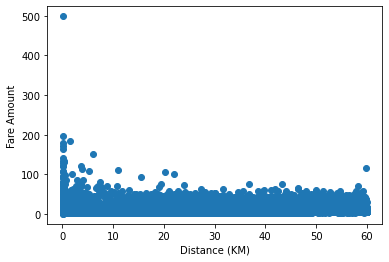

In [24]:
#Plotting
plt.scatter(data['Distance'],data['fare_amount'])
plt.xlabel('Distance (KM)')
plt.ylabel('Fare Amount')
plt.show()

In [25]:
#removing the rows with non-possible fare amounts and distance travelled
data.drop(data[(data['fare_amount']>100) & (data['Distance']<1)].index, inplace= True)
data.drop(data[(data['fare_amount']<100) & (data['Distance']>100)].index, inplace= True)
data.shape

(65501, 8)

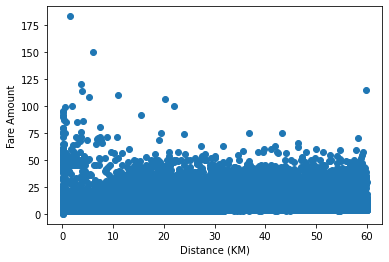

In [26]:
#Plotting
plt.scatter(data['Distance'],data['fare_amount'])
plt.xlabel('Distance (KM)')
plt.ylabel('Fare Amount')
plt.show()

In [27]:
#Creating a new Data Frame based on our use
new_data = pd.DataFrame().assign(Fare=data['fare_amount'], Distance=data['Distance'])

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65501 entries, 8 to 199996
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      65501 non-null  float64
 1   Distance  65501 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


In [29]:
new_data.shape

(65501, 2)

In [30]:
# Creating X and y
X=new_data['Distance'].values.reshape(-1,1)
y=new_data['Fare'].values.reshape(-1,1)

In [31]:
X

array([[14.53],
       [17.16],
       [49.03],
       ...,
       [42.02],
       [ 5.93],
       [17.9 ]])

In [32]:
y

array([[ 9.7],
       [ 3.3],
       [ 9.7],
       ...,
       [12. ],
       [ 3. ],
       [ 7.5]])

In [33]:
X.shape,y.shape

((65501, 1), (65501, 1))

In [34]:
#Preprocessing using StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_Std = ss.fit_transform(X)
y_Std = ss.fit_transform(y)

In [35]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_Std,y_Std,test_size=0.2)

In [36]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((52400, 1), (52400, 1)), ((13101, 1), (13101, 1)))

# Creating a LinearRegression Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
predictions=model.predict(X_test)

In [41]:
#finding error
from sklearn import metrics 
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predictions))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predictions))

Mean Absolute Error: 0.5188449887723344
Mean Squared Error: 1.1123630474129906
